In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
#data ='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [5]:
#!wget $data

In [6]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df = df.fillna(0)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [8]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)

In [9]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [12]:
train_dict = df_train.drop(columns=["fuel_efficiency_mpg"]).to_dict(orient="records")
val_dict = df_val.drop(columns=["fuel_efficiency_mpg"]).to_dict(orient="records")
test_dict = df_test.drop(columns=["fuel_efficiency_mpg"]).to_dict(orient="records")

In [72]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [14]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)


# decision tree regressor to predict the fuel_efficiency_mpg

In [74]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.46450122159263846)

In [75]:
# random forest

In [16]:
rf = RandomForestRegressor(max_depth = 1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(1.577472329647396)

# Training a random forest regressor with given parameters:

In [17]:
rf = RandomForestRegressor(n_estimators=10,
                           random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.4640452243766381)

# n_estimators parameter

In [23]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor( n_estimators = n, 
                                random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append(( n, rmse))

In [28]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.round(3).head()

,n_estimators,rmse
0,10,0.464
1,20,0.454
2,30,0.451
3,40,0.447
4,50,0.445


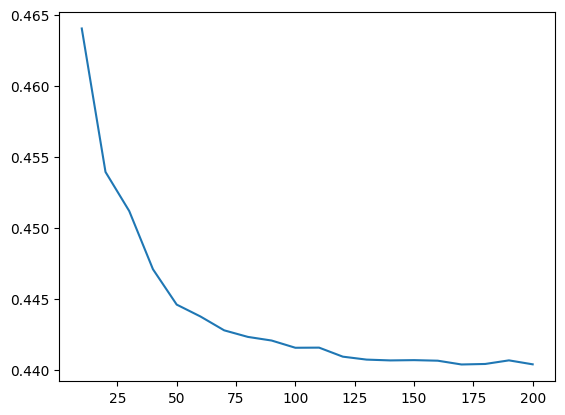

In [27]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [43]:
n_estimators = 10

# selecting the best max_depth

In [29]:
scores = []

for d in [ 10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append(( n, d, rmse))

In [37]:
columns = [ 'n_estimators', 'max_depth', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

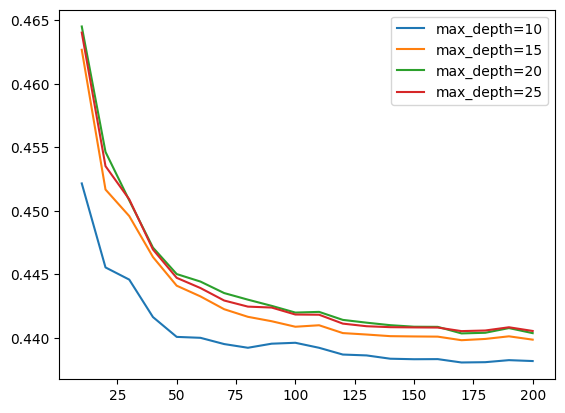

In [41]:
for d in [ 10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, 
             label='max_depth=%d' % d)

plt.legend()

In [42]:
max_depth = 20

# Training the model with given parameters

In [44]:
rf = RandomForestRegressor(n_estimators=10,
                            max_depth=20,
                            random_state=1, 
                            n_jobs=-1)
rf.fit(X_train, y_train)
        
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.46450122159263846)

# XGBoost

In [53]:
import xgboost as xgb

In [54]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest= xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [66]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [67]:
y_pred = model.predict(dval)

In [68]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.4525901737353802)

In [69]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
watchlist = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [70]:
y_pred = model.predict(dval)

In [71]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(0.43049514941747113)